In [83]:
import pandas as pd
import missingno as msno
import numpy as np
import math as m
%matplotlib inline

In [7]:
df=pd.read_csv('wine_review_train.csv')

In [8]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulk√† Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O‚ÄôKeefe,Nicosia 2013 Vulk√† Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [88]:
df_copy=df.copy()

In [12]:
df_copy.shape

(103727, 13)

In [13]:
df_copy.shape[0]

103727

In [14]:
df_copy.shape[1]

13

In [15]:
df_copy.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name', 'title',
       'variety', 'winery'],
      dtype='object')

In [16]:
list(df_copy.columns)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'title',
 'variety',
 'winery']

In [18]:
df_copy['title'].value_counts()

Segura Viudas NV Extra Dry Sparkling (Cava)                                                          8
Ruinart NV Brut Ros√©  (Champagne)                                                                   7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                                              7
Jacquart NV Brut Mosa√Øque  (Champagne)                                                              6
Boizel NV Brut R√©serve  (Champagne)                                                                 6
Pierre Sparr NV Brut R√©serve Sparkling (Cr√©mant d'Alsace)                                          6
Bailly-Lapierre NV Brut  (Cr√©mant de Bourgogne)                                                     6
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                                               6
Mailly Grand Cru NV Blanc de Noirs Brut Pinot Noir (Champagne)                                       5
Freixenet NV Cordon Negro Brut Sparkling (Cava)                          

In [21]:
df_copy['title'].unique()

array(['Nicosia 2013 Vulk√† Bianco  (Etna)',
       'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
       'Rainstorm 2013 Pinot Gris (Willamette Valley)', ...,
       'Domaine Gresser 2013 Kritt Gewurztraminer (Alsace)',
       'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)',
       'Domaine Schoffit 2012 Lieu-dit Harth Cuv√©e Caroline Gewurztraminer (Alsace)'],
      dtype=object)

In [22]:
l = []
bandera = np.NAN
for column in df_copy.columns:
    if df_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df_copy[column] =df_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy[column].nunique())
    print('UNIQUE: ', df_copy[column].unique())
    print('VALUE COUNTS ', df_copy[column].value_counts())
    print('\n')

COLUMNA:  Unnamed: 0
TIPO:  entero
NUNIQUE:  103727
UNIQUE:  [     0      1      2 ... 129968 129969 129970]
VALUE COUNTS  4094      1
109599    1
117779    1
128020    1
123926    1
125975    1
103448    1
105497    1
99354     1
111644    1
113693    1
107550    1
19491     1
62516     1
29732     1
31781     1
27687     1
7209      1
1066      1
15405     1
9262      1
11311     1
54320     1
56369     1
121873    1
119824    1
76815     1
74766     1
50098     1
52147     1
         ..
47554     1
45507     1
35268     1
39366     1
119151    1
115053    1
53583     1
117100    1
10576     1
8529      1
14674     1
2388      1
341       1
6486      1
4439      1
24921     1
31066     1
18780     1
16733     1
22878     1
20831     1
112994    1
100708    1
104806    1
102759    1
125288    1
123241    1
129386    1
127339    1
0         1
Name: Unnamed: 0, Length: 103727, dtype: int64


COLUMNA:  country
TIPO:  otro
NUNIQUE:  43
UNIQUE:  ['Italy' 'Portugal' 'US' 'Spain' 'France' 'G

In [89]:
df_copy.drop(['Unnamed: 0','region_2'], axis=1, inplace=True)

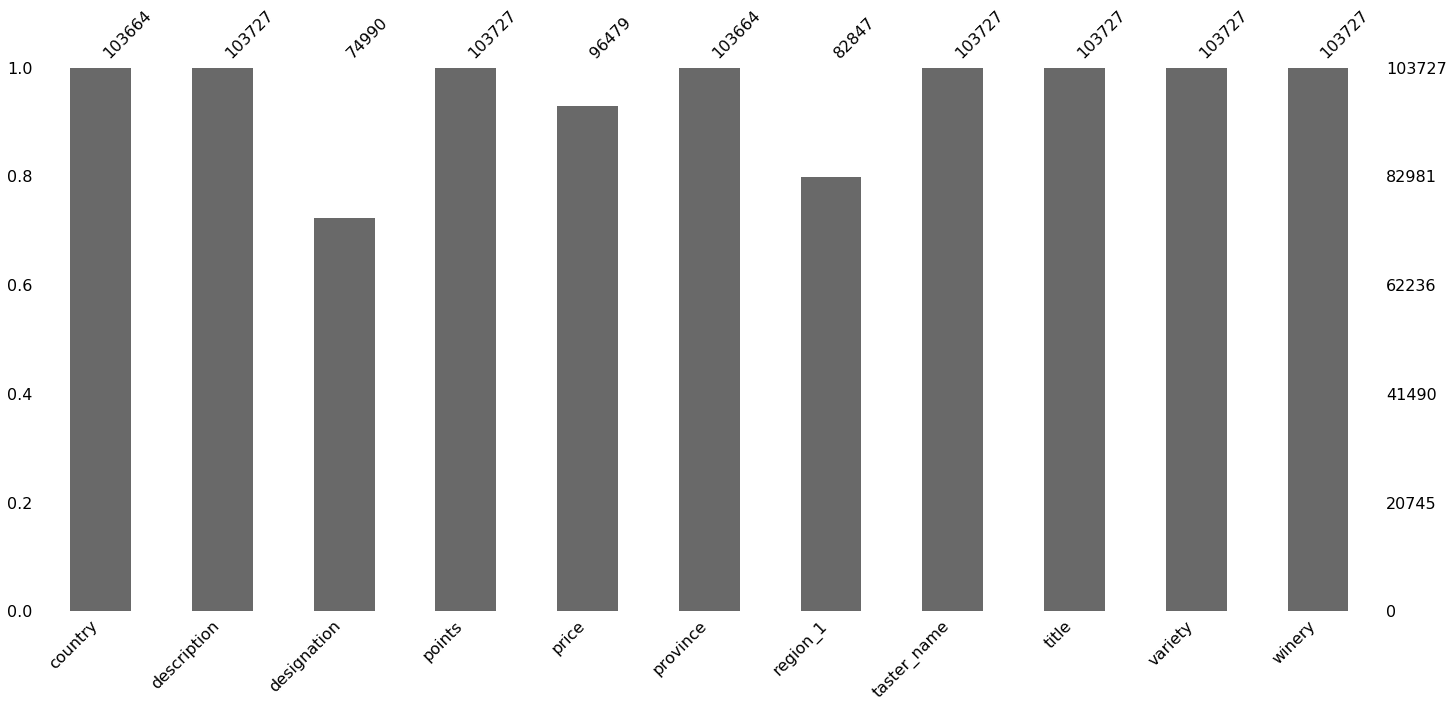

In [90]:
msno.bar(df_copy)

In [94]:
df_copy.isnull().any().any()

True

In [95]:
df_copy.replace(to_replace=' ', value =np.nan, inplace=True)

In [96]:
df_copy.replace(to_replace='&', value =np.nan, inplace=True)

In [97]:
df_copy.isnull().any().any()

True

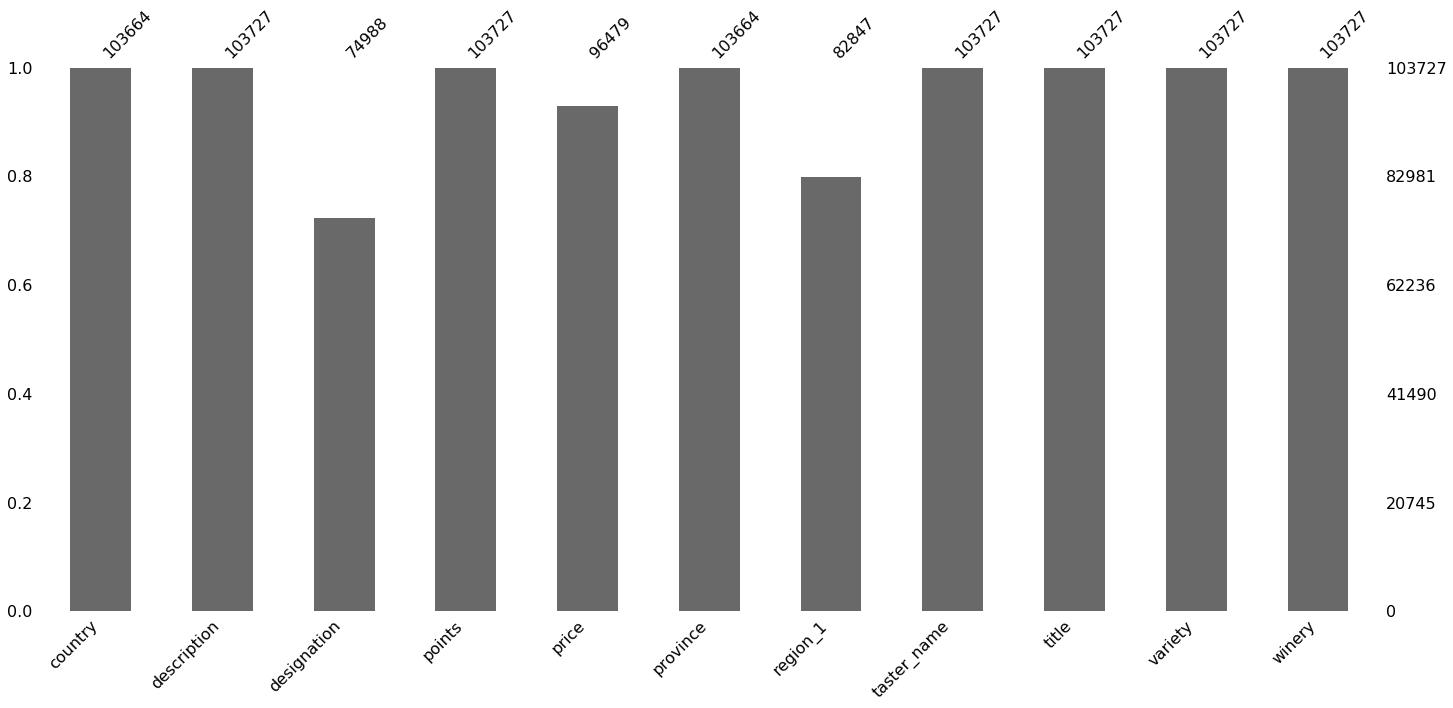

In [98]:
msno.bar(df_copy)

In [99]:
file ='wine_review_test_load.csv'

In [100]:
df_copy.to_csv(file)

In [101]:
df_copy.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulk√† Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O‚ÄôKeefe,Nicosia 2013 Vulk√† Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [105]:
df_copy.price.fillna(value=df_coppy['price'].mean(), inplace=True)

In [106]:
df_copy.points.fillna(value=df_coppy['points'].mean(), inplace=True)

In [107]:
df_copy.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulk√† Bianco,87,34.998642,Sicily & Sardinia,Etna,Kerin O‚ÄôKeefe,Nicosia 2013 Vulk√† Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [108]:
threshold = round(df_copy.price.shape[0]*.75)
threshold

77795

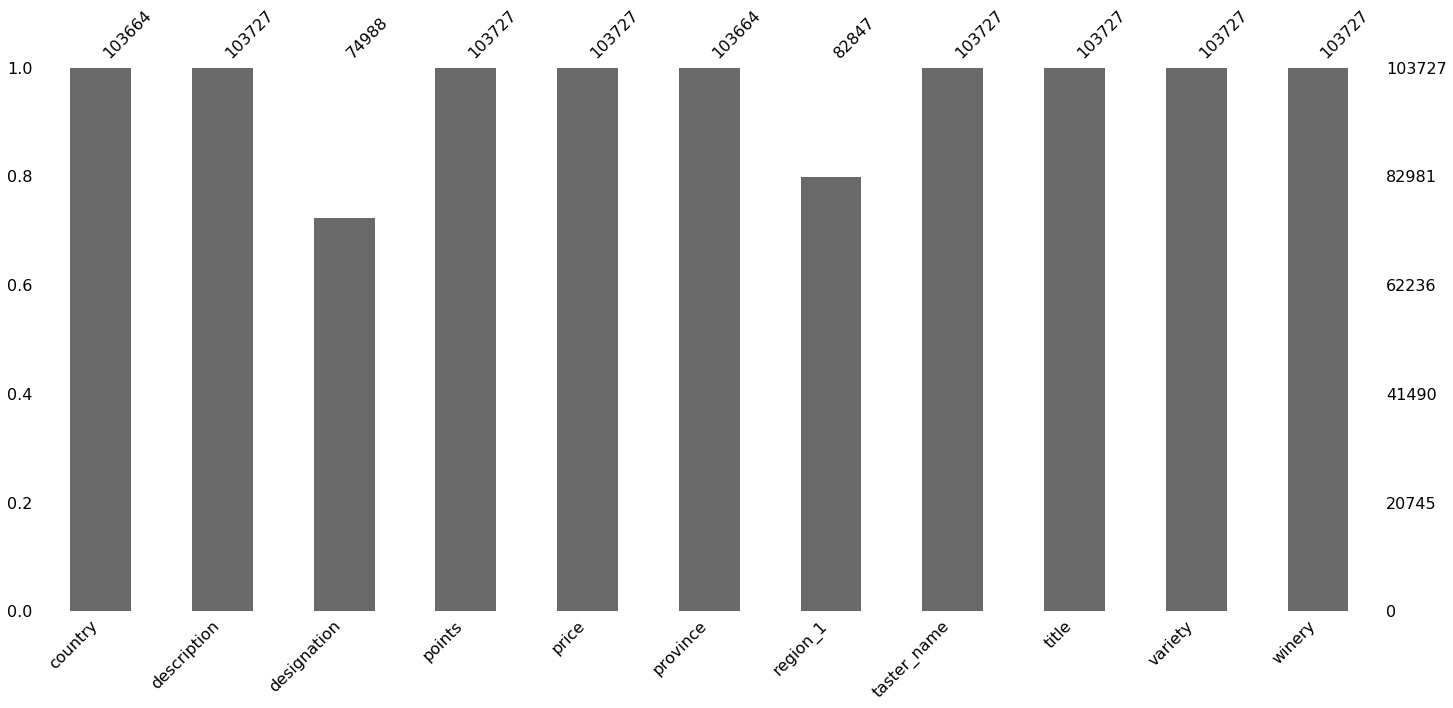

In [110]:
msno.bar(df_copy)

In [111]:
df_copy.dropna(inplace=True)

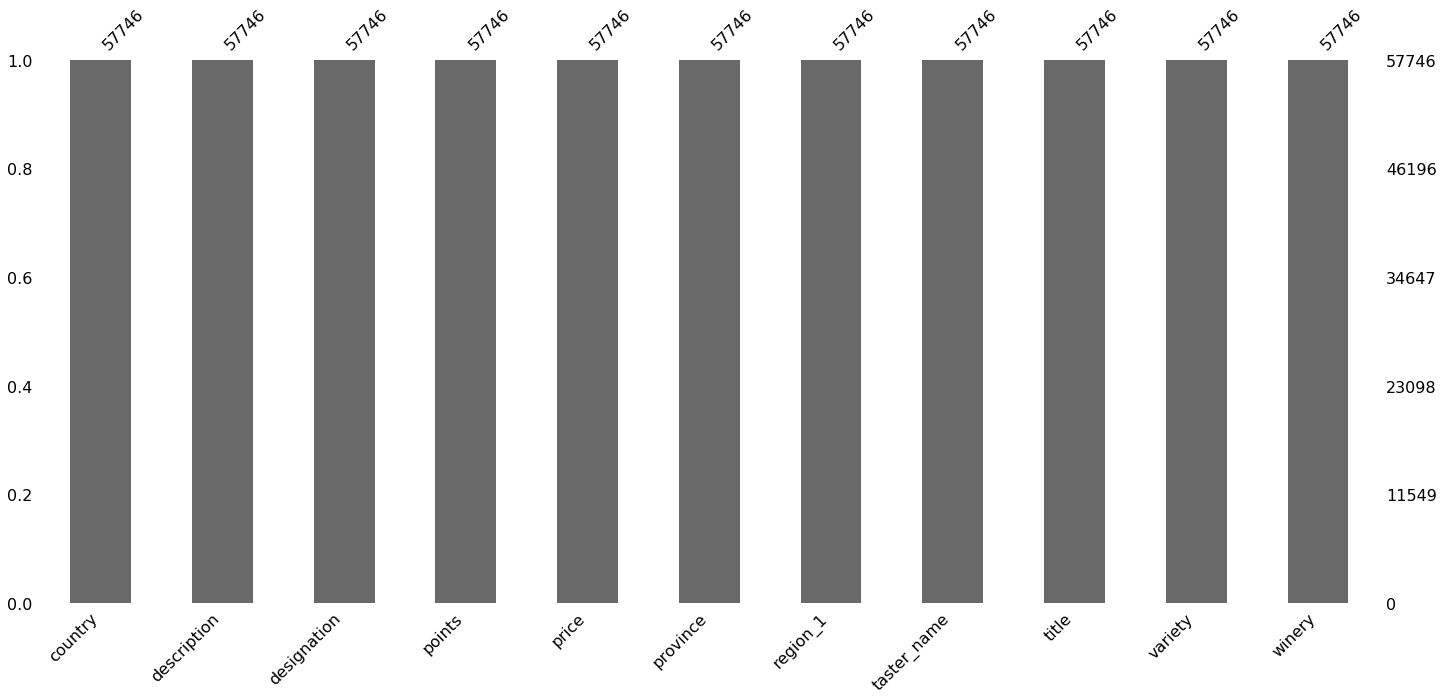

In [112]:
msno.bar(df_copy)

In [113]:
file='wine_review_test_clean.csv'

In [114]:
df_copy.to_csv(file)